 PREDICT THE PERCENTAGE OF MARKS OF STUDENT BASED ON NUMBER OF HOURS

Linear regression
#import libraries

In [17]:
import pandas as pd  
import numpy as np    
import matplotlib.pyplot as plt

In [18]:
data_load = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
print("Successfully imported data into console" )  


Successfully imported data into console


In [19]:

    data_load.head(6)  


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20


In [20]:
data_load.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [21]:
#plot to show relationship between data

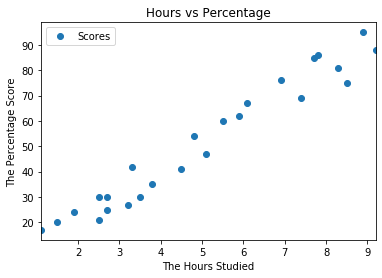

In [22]:

    data_load.plot(x='Hours', y='Scores', style='o')    
    plt.title('Hours vs Percentage')    
    plt.xlabel('The Hours Studied')    
    plt.ylabel('The Percentage Score')    
    plt.show()  


The plot shows positive relation between percentage score and hours studied

In [23]:

    X = data_load.iloc[:, :-1].values    
    y = data_load.iloc[:, 1].values  


Now we split data into train and test

In [25]:

    from sklearn.model_selection import train_test_split    
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)   


we split data into train and test ,now train our data

In [26]:

    from sklearn.linear_model import LinearRegression    
    regressor = LinearRegression()    
    regressor.fit(X_train, y_train)   
      
    print("Training ... Completed !.")  


Training ... Completed !.


plotting the regression line

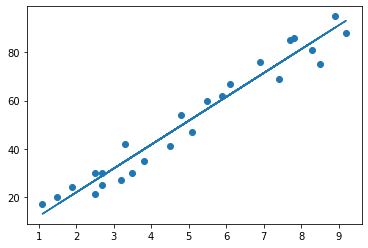

In [27]:

    line = regressor.coef_*X+regressor.intercept_  
    plt.scatter(X, y)  
    plt.plot(X, line);  
    plt.show()  


# Predictions

In [28]:

    print(X_test)   
    y_pred = regressor.predict(X_test)  


[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [29]:

    df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})    
    df  


,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Predicting the percentage for 9.25 hours

In [30]:

    hours = [[9.25]]  
    own_pred = regressor.predict(hours)  
    print("Number of hours = {}".format(hours))  
    print("Prediction Score = {}".format(own_pred[0]))  


Number of hours = [[9.25]]
Prediction Score = 93.69173248737539


EVALUATING THE MODEL

In [31]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373


You can see that the value of root mean squared error is 4.64, which is less than 10% of the mean value of the percentages of all the students i.e. 51.48. This means that our algorithm did a decent job.